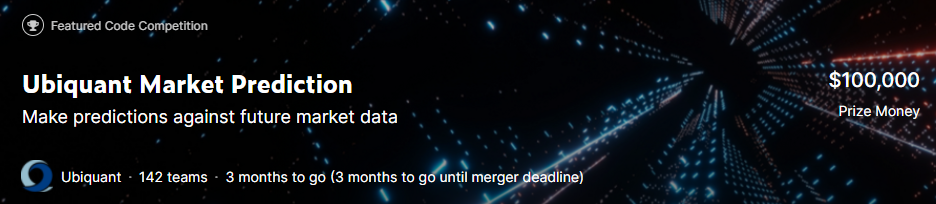

### あなたの課題は、取引の意思決定に関連する難読化されたメトリックの値を予測することです。

### Your challenge is to predict the value of an obfuscated metric relevant for making trading decisions.

### 【特徴】<br>
・テーブル系データ。未来データ予測。<br>
・このコンペのtrainデータはとにかくでかい(18GB)。どう割り切るかというのも重要そう。<br>
・約314万件のデータだが、カラムが302もある。<br>
・trainデータを読むだけでも4分以上かかる。

### [Characteristics] <br>
・Table data. Future data forecast.<br>
・The train data for this competition is huge(18GB).How to divide it seems to be important.<br>
・Although the data is about 3.14 million, there are 302 columns.<br>
・It takes more than 4 minutes just to read the train data.

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Import</span>

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import gc
import seaborn as sns
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
train =True

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Train data</span>

 データロードするとメモリ不足になってしまう。18GB.

 When I load data, I run out of memory.18GB.

In [ ]:
'''
train = pd.read_csv('../input/ubiquant-market-prediction/train.csv',chunksize=1000)
train
'''

https://www.kaggle.com/ilialar/ubiquant-eda-and-baseline

In [ ]:
data_types_dict = {
    'time_id': 'int32',
    'investment_id': 'int16',
    "target": 'float16',
}

features = [f'f_{i}' for i in range(300)]

for f in features:
    data_types_dict[f] = 'float16'
    
target = 'target'

f_0～300をfloat32からfloat16に変換して、精度を犠牲にしてメモリ削減をする。

Convert f_0 to 300 from float32 to float16 to reduce memory at the expense of precision.

In [ ]:
%%time
train = pd.read_csv('/kaggle/input/ubiquant-market-prediction/train.csv', 
                       usecols = data_types_dict.keys(),
                       dtype=data_types_dict, 
                       index_col = 0)
train

<pre>
row_id-行の一意の識別子。
time_id-データが収集された時刻のIDコード。 
        時間IDは順番に並んでいますが、時間ID間のリアルタイムは一定ではなく、最終的なプライベートテストセットの方がトレーニングセットよりも短くなる可能性があります。
Investment_id-投資のIDコード。 すべての投資がすべての時間IDにデータを持っているわけではありません。
target-ターゲット。
[f_0：f_299]-市場データから生成された匿名化された機能。

row_id - A unique identifier for the row.
time_id - The ID code for the time the data was gathered. The time IDs are in order, but the real time between the time IDs is not constant and will likely be shorter for the final private test set than in the training set.
investment_id - The ID code for an investment. Not all investment have data in all time IDs.
target - The target.
[f_0:f_299] - Anonymized features generated from market data.

time_idは1211種類あります。

There are 1211 different time_ids.

In [ ]:
len(train.index.unique())

time_idが0のものが2272行あります。investment_idは、3579種類あるから、この時間帯には全部のinvestment_idが表示されてはいません。

There are 2272 rows with a time_id of 0. There are 3579 different investment_ids, so not all investment_ids are shown for this time period.

In [ ]:
train[train.index==0]

investment_idは、3579個あります。

There are 3579 investment_ids.

In [ ]:
len(train.investment_id.unique())

In [ ]:
df = train.groupby(['investment_id'])['target'].mean().values

In [ ]:
train #.investment_id

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10))
# ax.axis('off')
ax.scatter(train.index, np.exp(train.target), s=100, cmap='viridis')
# ax.set_xlabel('bbox_width')
# ax.set_ylabel('bbox_height')
plt.show()

In [ ]:
qx = sns.jointplot(x=train.investment_id.unique(), y=train.groupby(['investment_id'])['target'].mean().values, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':'red'}})
qx.ax_joint.set_xlabel('investment_id')
qx.ax_joint.set_ylabel('target')
plt.show()

### investment_id,target(mean) 全体

### investment_id,target(mean) All

In [ ]:
data = train.groupby('investment_id').agg({'target':['mean']})
data.columns = data.columns.droplevel(0)
qx = sns.relplot(x='investment_id', y='mean', data=data, kind='line')
plt.gcf().set_size_inches(20, 8)
plt.show()

### investment_id,target(mean) 0-1000

In [ ]:
data = train.groupby('investment_id').agg({'target':['mean']})
data.columns = data.columns.droplevel(0)
qx = sns.relplot(x='investment_id', y='mean', data=data[:1000], kind='line')
plt.gcf().set_size_inches(20, 8)
plt.show()

### investment_id,target(mean) 1000-2000

In [ ]:
data = train.groupby('investment_id').agg({'target':['mean']})
data.columns = data.columns.droplevel(0)
qx = sns.relplot(x='investment_id', y='mean', data=data[1000:2000], kind='line')
plt.gcf().set_size_inches(20, 8)
plt.show()

### investment_id,target(mean) 2000-3000

In [ ]:
data = train.groupby('investment_id').agg({'target':['mean']})
data.columns = data.columns.droplevel(0)
qx = sns.relplot(x='investment_id', y='mean', data=data[2000:3000], kind='line')
plt.gcf().set_size_inches(20, 8)
plt.show()

### investment_id,target(mean) 3000-

In [ ]:
data = train.groupby('investment_id').agg({'target':['mean']})
data.columns = data.columns.droplevel(0)
qx = sns.relplot(x='investment_id', y='mean', data=data[3000:], kind='line')
plt.gcf().set_size_inches(20, 8)
plt.show()

In [ ]:
x = train.investment_id.value_counts()
x

In [ ]:
x[:2500]

In [ ]:
x.index[:2500]

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Test data</span>

In [ ]:
test = pd.read_csv('../input/ubiquant-market-prediction/example_test.csv')
test

row_idはtime_idとinvestment_idを_でつなげたもの。

row_id is time_id and investment_id connected by _.

In [ ]:
train.index[-5:]

trainのデータには、time_idが0～1219まである。testのデータのtime_idは1220-1223なので、trainデータの直後のデータを予測する必要があります。

The train data has a time_id of 0-1219; the test data has a time_id of 1220-1223, so we need to predict the data immediately after the train data.

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Submission</span>

In [ ]:
sub = pd.read_csv('../input/ubiquant-market-prediction/example_sample_submission.csv')
sub.to_csv('submission.csv',index=False)
sub

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Heatmap</span>

あまりにデータが多いので１０カラムづつヒートマップを出してみます。<br>
・ターゲットと直接強い関係のあるものはないようです。<br>
・だからといって全部学習対象にするのはいいかはまだわかりません。<br>

Since there is too much data, I will put out a heat map for each 10 columns.<br>
・ There seems to be nothing that has a strong direct relationship with the target.<br>
・ But I still don't know if it's okay to study everything.<br>

In [ ]:
x=10
from matplotlib import pyplot as plt
import seaborn as sns
for i in range(30):
    plt.figure(figsize=(10,8))
    sns.heatmap(train[['target',f'f_{i*x+0}',f'f_{i*x+1}',f'f_{i*x+2}',f'f_{i*x+3}',f'f_{i*x+4}',f'f_{i*x+5}',f'f_{i*x+6}',f'f_{i*x+7}',f'f_{i*x+8}',f'f_{i*x+9}']].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
    plt.show()

In [ ]:
color=['blue','orange','red','green','purple','brown','pink','olive','cyan','black']

100件のデータを見てみる。
Let's look at 100 data.

In [ ]:
check = train[:100].reset_index(drop=True)
fig = plt.figure(figsize=(30,800))
x=1
for i in range(300): 
    fig.add_subplot(75,4, x)
    a ='f_' + str(i)
    plt.title(a,fontsize=18)
    plt.plot(check.index,check[f'f_{i}'])
    x+=1

ためしにf_8だけみてみましょう

Let's try only f_8

In [ ]:
cig = plt.figure(figsize=(30,40))
plt.title('f_8',fontsize=18)
plt.plot(train.index,train[f'f_{8}'])

# Feature Importance

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
#!pip install optuna
import optuna 
import optuna.integration.lightgbm as lgbo

In [ ]:
y=train['target']
X=train.drop(['target'],axis=1)

model = lgb.LGBMRegressor(n_estimators=150) 
model.fit(X, y)

In [ ]:
fi =model.feature_importances_
fi_df = pd.DataFrame({'feature': list(X.columns),
                      'feature importance': fi[:]}).sort_values('feature importance', ascending = False)

In [ ]:
fi_df

In [ ]:
import seaborn as sns; sns.set()
plt.figure(figsize=(40, 20), dpi=50)
plt.xticks(rotation=90)
sns.lineplot(x="feature", y="feature importance", data=fi_df[:50])

In [ ]:
a = fi_df.feature[:10].to_list() 
a.append('target')
a

### feature importanceの上位１０個のヒートマップを出してみる。

### Let me give you a heatmap of the top 10 feature importance.

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train[a].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()